In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [238]:

# 한글폰트 설정 2
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='./resources/fonts/NotoSansKR-Regular.otf').get_name()
rc('font',family=font_name)
# 한글폰트 설정 1
plt.rcParams['font.family'] = 'Noto Sans KR'

In [239]:
ddd = pd.read_csv('./data/지역별순이동-통합2012-2022.csv')
ddd

,Year,Region,순이동률,전입률,전출률
0,2012,Gangwon-do,0.0,14.8,14.8
1,2012,Gyeonggi-do,0.7,16.3,15.6
2,2012,Gyeongsangnam-do,-0.1,12.6,12.7
3,2012,Gyeongsangbuk-do,-0.2,12.5,12.7
4,2012,Gwangju,-0.1,15.7,15.8
...,...,...,...,...,...
193,2022,Jeollanam-do,0.0,10.5,10.6
194,2022,NaN,-0.3,11.3,11.5
195,2022,Jeju,0.5,12.9,12.4
196,2022,Chungcheongnam-do,0.7,12.3,11.6


In [240]:
df_move = pd.read_csv('data/지역별순이동률2012-2022-연령별.csv')
df_move['순이동률']  = df_move['MigrationRate']
df_move.drop(columns='MigrationRate',inplace=True)
df_move

,Year,Region,AgeGroup,순이동률
0,2012,Whole country,어린이,3.465000
1,2012,Whole country,청소년,3.025000
2,2012,Whole country,청년,2.067857
3,2012,Whole country,중년,1.700000
4,2012,Whole country,노인,0.534375
...,...,...,...,...
33655,2022,Jeju,어린이,0.555000
33656,2022,Jeju,청소년,0.337500
33657,2022,Jeju,청년,0.085714
33658,2022,Jeju,중년,-0.100000


# 가설 3: 지방의 청년 인구 유출이 자연증가율 마이너스로 연결된다.

In [241]:
capital_regions = ["Seoul", "Incheon", "Gyeonggi-do"]

df_move["Is_Capital"] = df_move["Region"].isin(capital_regions)

capital_df     = df_move[df_move["Is_Capital"] == True]
non_capital_df = df_move[df_move["Is_Capital"] == False]


<Axes: xlabel='Year', ylabel='순이동률'>

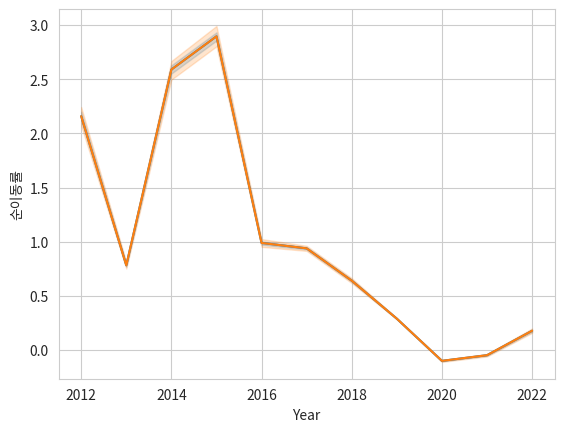

In [242]:
sns.lineplot(data=non_capital_df,x='Year',y='순이동률')
sns.lineplot(data=capital_df,x='Year',y='순이동률')

In [243]:
df_move[(df_move['Is_Capital'] == True) & (df_move['AgeGroup'] == '청년')]

,Year,Region,AgeGroup,순이동률,Is_Capital
7,2012,Seoul,청년,2.067857,True
22,2012,Incheon,청년,2.067857,True
47,2012,Gyeonggi-do,청년,2.067857,True
97,2012,Seoul,청년,2.067857,True
112,2012,Incheon,청년,2.067857,True
...,...,...,...,...,...
33502,2022,Incheon,청년,0.085714,True
33527,2022,Gyeonggi-do,청년,0.085714,True
33577,2022,Seoul,청년,0.085714,True
33592,2022,Incheon,청년,0.085714,True


In [244]:
df_capital_youth = df_move[(df_move['Is_Capital'] == True) & (df_move['AgeGroup'] == '청년')]
df_capital_youth

,Year,Region,AgeGroup,순이동률,Is_Capital
7,2012,Seoul,청년,2.067857,True
22,2012,Incheon,청년,2.067857,True
47,2012,Gyeonggi-do,청년,2.067857,True
97,2012,Seoul,청년,2.067857,True
112,2012,Incheon,청년,2.067857,True
...,...,...,...,...,...
33502,2022,Incheon,청년,0.085714,True
33527,2022,Gyeonggi-do,청년,0.085714,True
33577,2022,Seoul,청년,0.085714,True
33592,2022,Incheon,청년,0.085714,True


In [245]:
df_local_youth = df_move[(df_move['Is_Capital'] == False) & (df_move['AgeGroup'] == '청년')].copy()
df_local_youth

,Year,Region,AgeGroup,순이동률,Is_Capital
2,2012,Whole country,청년,2.067857,False
12,2012,Busan,청년,2.067857,False
17,2012,Daegu,청년,2.067857,False
27,2012,Gwangju,청년,2.067857,False
32,2012,Daejeon,청년,2.067857,False
...,...,...,...,...,...
33637,2022,NaN,청년,0.085714,False
33642,2022,Jeollanam-do,청년,0.085714,False
33647,2022,Gyeongsangbuk-do,청년,0.085714,False
33652,2022,Gyeongsangnam-do,청년,0.085714,False


In [246]:
df_compare = pd.concat([df_capital_youth, df_local_youth], ignore_index=True)
df_local_youth2 = df_compare[(df_compare['Is_Capital'] == False)]
df_capital_youth2 = df_compare[(df_compare['Is_Capital'] == True)]

<Axes: xlabel='Year', ylabel='순이동률'>

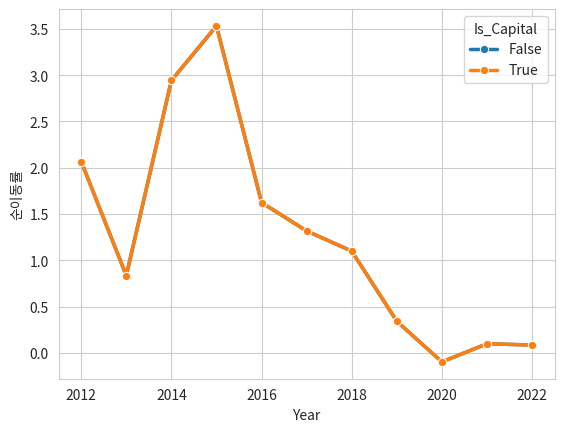

In [247]:
sns.lineplot(data=df_compare, x='Year', y='순이동률', hue='Is_Capital', marker='o', linewidth=2.5)


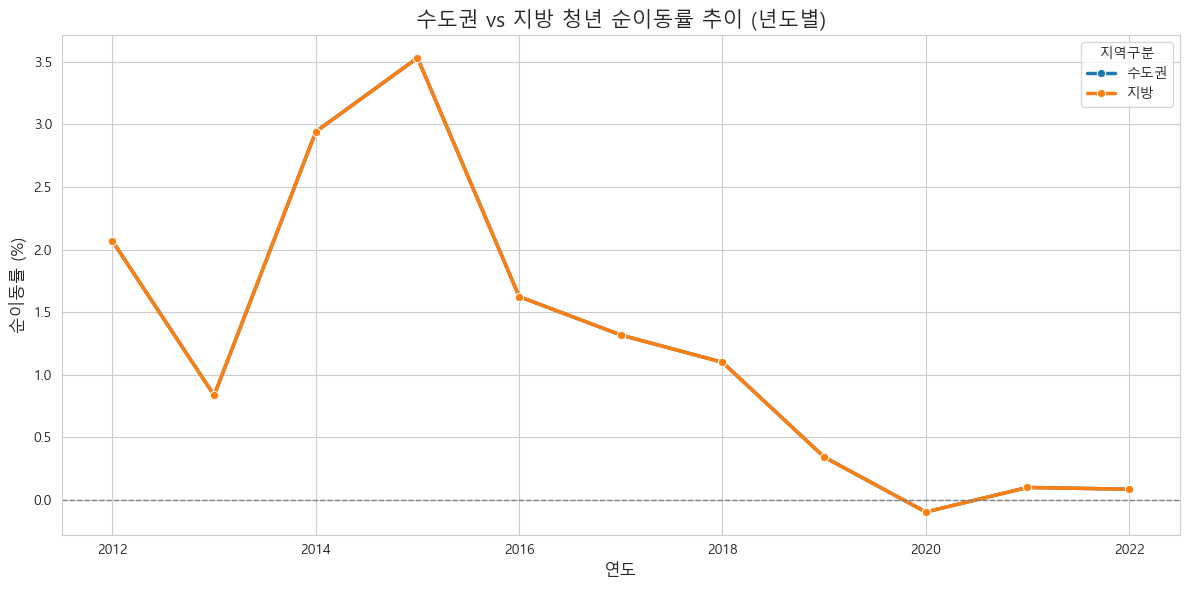

In [248]:
# 수도권 청년 데이터
df_capital_youth = df_move[(df_move['Is_Capital'] == True) & (df_move['AgeGroup'] == '청년')].copy()
df_capital_youth['지역구분'] = '수도권'

# 지방 청년 데이터
df_local_youth = df_move[(df_move['Is_Capital'] == False) & (df_move['AgeGroup'] == '청년')].copy()
df_local_youth['지역구분'] = '지방'

# 두 데이터 합치기
df_compare = pd.concat([df_capital_youth, df_local_youth], ignore_index=True)

# 연도별 평균 순이동률 계산
df_plot = df_compare.groupby(['Year', '지역구분'])['순이동률'].mean().reset_index()

# 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='Year', y='순이동률', hue='지역구분', marker='o', linewidth=2.5)

plt.title('수도권 vs 지방 청년 순이동률 추이 (년도별)', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('순이동률 (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title='지역구분')
plt.tight_layout()
plt.show()


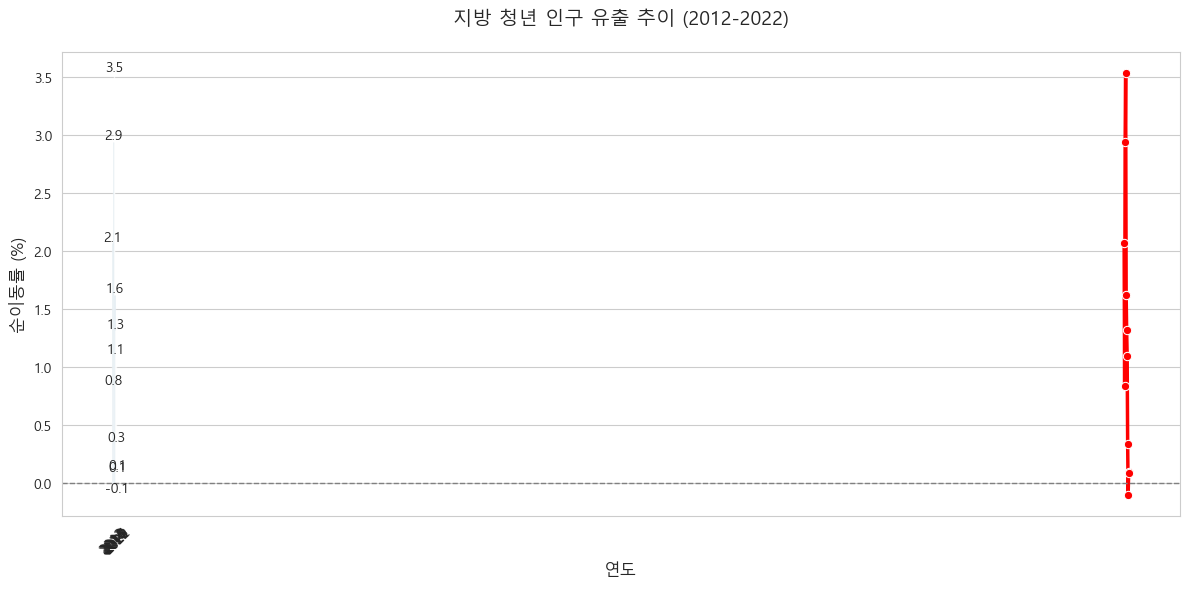

In [249]:
# 1. 데이터 필터링
df_local_youth = df_move[
    (df_move['Is_Capital'] == False) & 
    (df_move['AgeGroup'] == '청년')
].copy()

# 2. 연도별 순이동률 평균 계산
yearly_migration = df_local_youth.groupby('Year')['순이동률'].mean().reset_index()

# 3. 그래프 설정
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 4. 바 플롯 + 라인 플롯
ax = sns.barplot(
    data=yearly_migration,
    x='Year',
    y='순이동률',
    color='#1f77b4',
    alpha=0.7
)

# 5. 추세선 추가
sns.lineplot(
    data=yearly_migration,
    x='Year',
    y='순이동률',
    color='red',
    marker='o',
    linewidth=2.5,
    ax=ax
)

# 6. 그래프 꾸미기
plt.title('지방 청년 인구 유출 추이 (2012-2022)', fontsize=14, pad=20)
plt.xlabel('연도', fontsize=12)
plt.ylabel('순이동률 (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # 기준선
plt.xticks(rotation=45)

# 7. 데이터 레이블 추가
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.02,
            f'{height:.1f}',
            ha="center")

plt.tight_layout()
plt.show()
